# 6.1
>最小木問題の最適解を利用した, 巡回セールスマン問題の近似解法を考える.
>重み付き無向グラフ $G = (V, E, c)$ が与えられている.
>ただし, 任意の2点間には辺が存在し, 辺の重みは正で三角不等式を満たすものとする.
>図 6.13(a) は6つの点からなるグラフ $G$ の例であり, 各辺の重みはその端点間のユークリッド距離で定められているとする.
>近似解としては, まず $G$ の最小木を求める.
>次に最小木の各辺を $2$ 本ずつにし, それぞれに異なる向きをつける.
>そして, この向きのついた辺をすべてたどる経路を考える.
>この経路ですでに一度訪れた点はスキップすることにすると, 巡回路が得られる.
>この巡回路が巡回セールスマン問題の近似解になっている.
>次の問いに答えよ.

(i)
>図 6.13(a) のグラフにおいて, 点 $v_5$ を始点にした場合はどのような近似解が得られるか.

- $v_3$ の後に $v_1$ に進んだケース: $v_5 \to v_6 \to v_3 \to v_1 \to v_2 \to v_4 \to v_5$.
- $v_3$ の後に $v_2$ に進んだケース: $v_5 \to v_6 \to v_3 \to v_2 \to v_4 \to v_1 \to v_5$.

(ii)
>この解法が $2$-近似解法であることを示せ.

最適巡回路の重みを $\overline{f}$, 上記の近似解法で得られる巡回路の重みを $f^o$ とする.
また, グラフの最小全域木の重みを $f^{\mathrm{tree}}$ とする.
巡回路から辺を1つ除くと全域木になり, 重みはユークリッド距離のため非負であるため,
$$
    \overline{f} \ge f^{\mathrm{tree}}. \tag{1}
$$
近似解は, 最小全域木上で一周するようにした上で重複点は飛ばすようにしたものであるため, 三角不等式より以下が成り立つ.
$$
    2 f^{\mathrm{tree}} \ge f^o. \tag{2}
$$
したがって (1) (2) より
$$
f^o \le 2 \overline{f}
$$
なので, この解法は $2$-近似解である.$_\square$

# 6.2
>無向グラフ $G = (V, E)$ が与えられたとき, カット $(S, V\setminus S)$ に含まれる辺の数が最大になるような $V$ の部分集合 $S$ を求める問題を, 最大カット問題と呼ぶ.
>次の問いに答えよ.

(i)
>最大カット問題に対して, 次の局所探索法を考える.
>まず, $V$ からランダムにいくつかの点を選んで $S$ とする.
>次に, $V\setminus S$に属する点のうち, それを $S$ に移すことでカットの本数が増える点を $S$ に移す.
>また, 同様に, $S$ に属する点のうち, それを $V \setminus S$ に移すことでカットの本数が増える点を $V\setminus S$ に移す.
>このような操作を, $S$ が更新されなくなるまで繰り返す.
>この局所探索法は, 最大カット問題の $0.5$-近似解法であることを示せ.

上記の近似解法によって得られた解を $S^o$ とする.  
各点 $v \in V$ に対し, $v$ と繋がっている辺のうちカット $(S^o, V\setminus S^o)$ に含まれる辺の数を $c_v$, 含まれない辺の数を $d_v$ とおく.  
まず各辺は $2$ つの点を結ぶものなので,
$$\sum_{v \in V} (c_v + d_v) = 2 |E|. \tag{1}$$
また, 各点 $v$ について, 
$$ c_v \ge d_v \tag{2}$$
が成り立つはずである.
なぜなら, これが成り立たないとすると点 $v$ を移すことでカットの本数が増えることになってしまい, 仮定に反するからである.  
よって, (1) (2) より,
$$ \frac{1}{2}\sum_{v \in V} c_v \ge \frac{1}{2}|E|. \tag{3}$$
(3) の左辺がこの近似解におけるカットの本数に他ならず, また最適値は明らかに $|E|$ 以下なので, この解法は $0.5$-近似解法である.$_\square$

(ii)
>最大カット問題に対して, 劣モジュラ最大化に基づく貪欲算法を設計せよ.

1. $S_0 \leftarrow \emptyset$ と初期化する.
2. for $k = 1, 2, \dots, |V|$ do
    - if $V\setminus S_{k-1}$ に含まれる点 $v$ のうち, $S_{k-1}$ に加えることでカット本数が増えるものが存在する:
        - $j^* \leftarrow $最もカット本数の増分が大きい点
        - $S_k \leftarrow S_{k-1} \cup \{j^*\}$
    - else:
        - $S_k \leftarrow S_{k-1}$
3. $S_{|V|}$ を出力.

# 6.3
>**$k$-センター問題**とは, データ点の集合 $V = \{s_1, s_2, \dots, s_m\}$ に対して以下の最適化問題として定式化される.
>$$
>\min_{U \subseteq V: |U| = k} \max_{v \in V}\rho(v, U)
>$$

(i)
>最遠点クラスタリング法がこの $k$-センター問題の $2$-近似解を得ることを示せ.

最遠点クラスタリングによって得られるセンターを順に $s_1^o, s_2^o, \dots, s_k^o$ とし, その次に $k+1$ 番目の点を選ぶとしたら選ばれる点を $s_{k+1}^o$ とおく.
この近似解における値 $f^o$ は
$$ f^o = \rho(s_{k+1}^o, \{s_1^o,\dots, s_k^o\}) $$
であり, $s_1^o, \dots, s_{k+1}^o$ の任意の2点間の距離は $f^o$ 以上である.  

$k$-センター問題における最適解を $U^* = \{s_1^*, \dots, s_k^*\}$ とし, 最適値を $f^*$ とおく.  
$s_1^o, \dots, s_{k+1}^o$ の内の少なくともある $2$ 点 $s_i^o, s_j^o$ について, $U^*$ 内で最も近い点が同じであるはずである（これを $s_h^*$ とする）.  
したがって,
$$
\begin{align*}
f^* &\ge \max\{ \rho(s_i^o, s_{h}^*) , \rho(s_j^o, s_{h}^*)\} \\
&\ge \frac{1}{2}(\rho(s_i^o, s_{h}^*) +\rho(s_j^o, s_{h}^*)) \\
& \ge \frac{1}{2}\rho(s_i^o, s_j^o)\\
&\ge \frac{1}{2}f^o.
\end{align*}
$$
よって $f_o \le 2 f^*$ であり, この解法は $2$-近似解法である.$_\square$

(ii)
>最遠点クラスタリング法で得られる解の目的関数値が, $k$-センター問題の最適値のちょうど $2$ 倍になるようなデータの例をあげよ.

次の $6$ 点に対する $k=2$-センター問題を考える（距離は普通のユークリッド距離）.

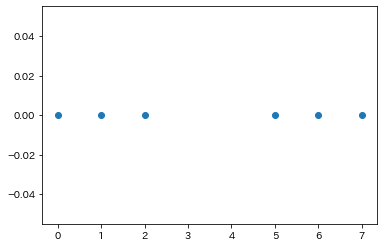

In [1]:
import matplotlib.pyplot as plt
plt.scatter([0,1,2,5,6,7], [0]*6)
plt.show()

最適解は明らかに, $x = 1, 6$ の位置の2点をセンターとするものであり, 最適値は $1$ になる.

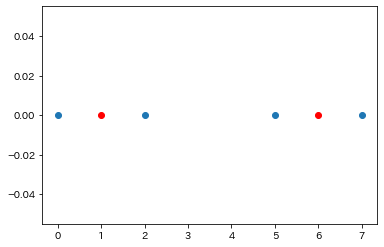

In [2]:
plt.scatter([0,2,5,7], [0]*4)
plt.scatter([1,6], [0]*2, c="red")
plt.show()

最遠点クラスタリングでは最初の点 $s_1$ は任意に選ばれるが, 一般性を失うことなく左3つのうちどれかが選ばれたとして良い.  
このとき, $s_2$ は $x = 7$ の位置にある点となり, この解における値は $5$ と $7$ の距離である $2$ になる.  
したがって, この例では最初の点がどのように選ばれたとしても, 最遠点クラスタリングで得られる解の値は $2$ であり, 最適値のちょうど $2$ 倍となる.

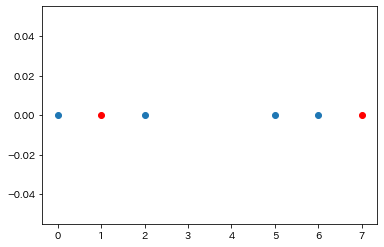

In [3]:
# 最初に x = 1 の位置の点が選ばれた場合の例
plt.scatter([0,2,5,6], [0]*4)
plt.scatter([1,7], [0]*2, c="red")
plt.show()

# 6.4
>無向グラフ $G = (V, E)$ に関して, 次の問いに答えよ.

(i)
>点集合 $S \subseteq V$ に属する点を端点とする辺の数を $f(S)$ で表すとき, $f$ が劣モジュラ関数であることを示せ.

任意の $S\subset T (\subset V)$ と任意の $j \in V \setminus T$ に対し,
$$
\begin{align*}
&f(S \cup \{j\}) - f(S) = |\{(j, k) \in E \mid k \notin S\}|, \\
&f(T \cup \{j\}) - f(T) = |\{(j, k) \in E \mid k \notin T\}| 
\end{align*}
$$
であり, $S \subset T$ より
$$
\{(j, k) \in E \mid k \notin T\} \subset \{(j, k) \in E \mid k \notin S\}
$$
なので, 
$$
f(S \cup \{j\}) - f(S) \ge f(T \cup \{j\}) - f(T).
$$
したがって, $f$ は劣モジュラ関数である.$_\square$

(ii)
>辺集合 $T \subseteq E$ に属する辺の端点である点の数を $g(T)$ で表すとき, $g$ が列モジュラ関数であることを示せ.

任意の $S \subset T (\subset E)$ と任意の $e \in E \setminus T$ に対し,
$$
\begin{align*}
&g(S\cup\{e\}) - g(S) = |\{v \in V \mid \text{$v$ は $e$ の端点であり, $S$ 内の辺の端点でない}\}|, \\
&g(T\cup\{e\}) - g(T) = |\{v \in V \mid \text{$v$ は $e$ の端点であり, $T$ 内の辺の端点でない}\}|
\end{align*}
$$
であり, $S \subset T$ より
$$
\begin{align*}
&\{v \in V \mid \text{$v$ は $e$ の端点であり, $T$ 内の辺の端点でない}\}\\
\subset \ &\{v \in V \mid \text{$v$ は $e$ の端点であり, $S$ 内の辺の端点でない}\}
\end{align*}
$$
なので, 
$$
g(S\cup\{e\}) - g(S) \ge g(T\cup\{e\}) - g(T).
$$
したがって, $g$ は劣モジュラ関数である.$_\square$